## 1. Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.svm import SVC # SVC는 함수
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [2]:
iris = sklearn.datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.1,shuffle=False)

## 3. Model Generate and Training

In [4]:
model = SVC()
model.fit(X_train, y_train) #데이터

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## 4. predict

In [5]:
# 미지의 데이터를 넣어서 예측을 해본다.
predict = model.predict(X_test)
print(predict)

['virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica']


In [6]:
print(f'정확도 : {accuracy_score(y_test,predict).round(3)}')

정확도 : 0.933


## 4. Visualization

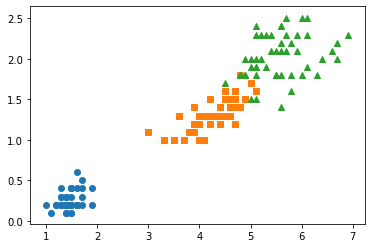

In [7]:
markers=['o','s','^']
for i,target in enumerate(iris.target_names):
    target_cluster = df[df['target'] == target]
    plt.scatter(target_cluster['petal length (cm)'], target_cluster['petal width (cm)'], marker=markers[i])